## Projet 2 Proposal -  DATASCI200 Introduction to Data Science Programming, UC Berkeley MIDS

In [ ]:
# Questions
# What is the distribution of pitch velocities across different pitch types in the 2023 season?
# How does pitch accuracy vary with pitch velocity?
# Which pitchers had the fastest average fastball speed in 2023?
# Do high-pressure playoff situations affect pitch selection compared to regular-season games?

In [2]:
pip install pybaseball

  Obtaining dependency information for pybaseball from https://files.pythonhosted.org/packages/bb/66/5ef47f5830570a30afbdfbd741cdf3e5a1a31c4c588514ab69bc074e8704/pybaseball-2.2.7-py3-none-any.whl.metadata
  Obtaining dependency information for beautifulsoup4>=4.4.0 from https://files.pythonhosted.org/packages/b1/fe/e8c672695b37eecc5cbf43e1d0638d88d66ba3a44c4d321c796f4e59167f/beautifulsoup4-4.12.3-py3-none-any.whl.metadata
  Obtaining dependency information for requests>=2.18.1 from https://files.pythonhosted.org/packages/f9/9b/335f9764261e915ed497fcdeb11df5dfd6f7bf257d4a6a2a686d80da4d54/requests-2.32.3-py3-none-any.whl.metadata
  Obtaining dependency information for lxml>=4.2.1 from https://files.pythonhosted.org/packages/eb/6d/d1f1c5e40c64bf62afd7a3f9b34ce18a586a1cccbf71e783cd0a6d8e8971/lxml-5.3.0-cp312-cp312-macosx_10_9_universal2.whl.metadata
  Obtaining dependency information for pyarrow>=1.0.1 from https://files.pythonhosted.org/packages/e4/ea/a7f77688e6c529723b37589af4db3e7179414

This is a large query, it may take a moment to complete


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pybaseball/statcast.py:50: UserWarning: 
That's a nice request you got there. It'd be a shame if something were to happen to it.
We strongly recommend that you enable caching before running this. It's as simple as `pybaseball.cache.enable()`.
Since the Statcast requests can take a *really* long time to run, if something were to happen, like: a disconnect;
gremlins; computer repair by associates of Rudy Giuliani; electromagnetic interference from metal trash cans; etc.;
you could lose a lot of progress. Enabling caching will allow you to immediately recover all the successful
subqueries if that happens.
  warnings.warn(_OVERSIZE_WARNING)
  0%|          | 0/186 [00:00<?, ?it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passin

Columns in the dataset:
Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description',
       ...
       'n_thruorder_pitcher', 'n_priorpa_thisgame_player_at_bat',
       'pitcher_days_since_prev_game', 'batter_days_since_prev_game',
       'pitcher_days_until_next_game', 'batter_days_until_next_game',
       'api_break_z_with_gravity', 'api_break_x_arm', 'api_break_x_batter_in',
       'arm_angle'],
      dtype='object', length=113)

First 5 rows of the dataset:
     pitch_type  game_date  release_speed  release_pos_x  release_pos_z  \
2384         CH 2023-10-01           89.0           -2.8           5.59   
2477         FF 2023-10-01           96.9           -2.4            5.9   
2573         CH 2023-10-01           90.0          -2.93           5.56   
2659         ST 2023-10-01           82.2          -3.09           5.55   
2786         CH 2023-10-01           89.2          -2.87    

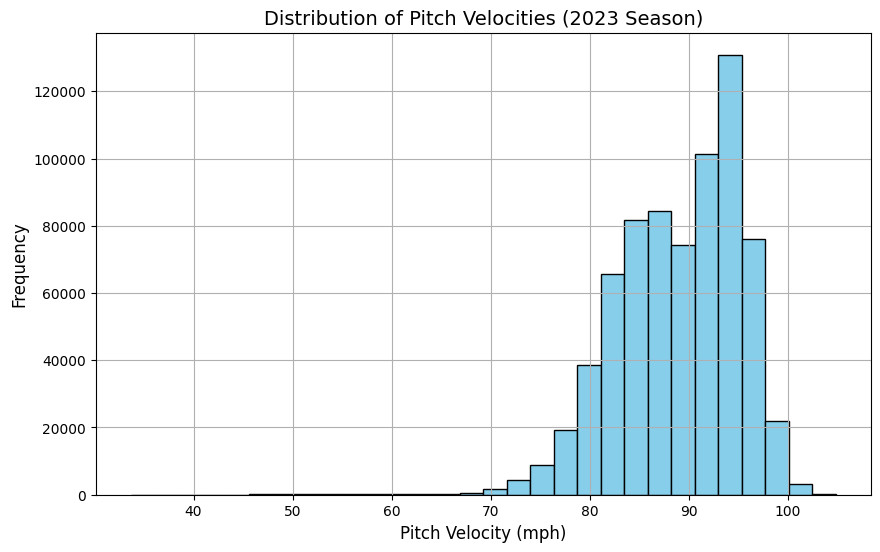

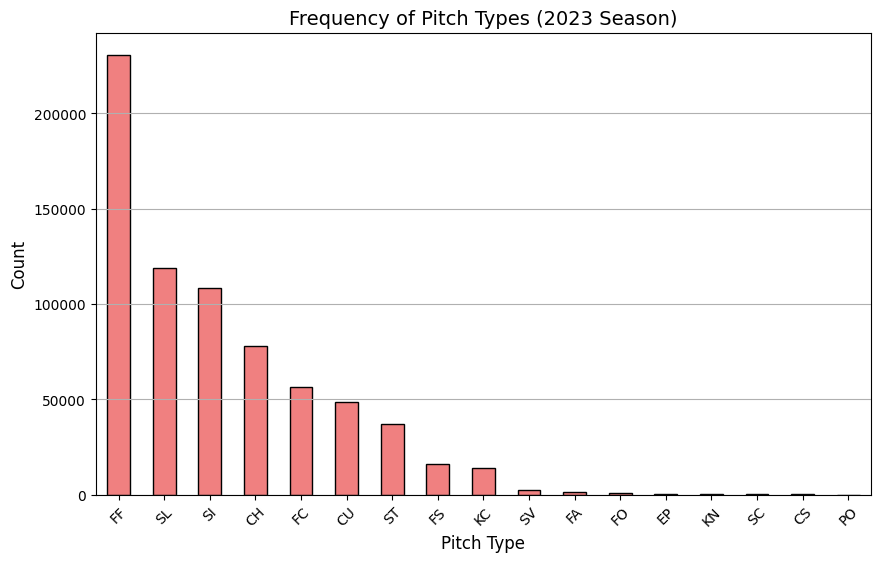


Preliminary Insights:
The most common pitch type is FF with 230830 instances.
The average pitch velocity is 89.00 mph.
The average spin rate is 2249.16 RPM.


In [ ]:
# Import necessary libraries
from pybaseball import statcast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Pull Data for the 2023 MLB Season
# Define the date range for the 2023 season
start_date = "2023-03-30"  # Opening Day of 2023 MLB season
end_date = "2023-10-01"  # End of Regular Season

# Fetch Statcast data
data_2023 = statcast(start_dt=start_date, end_dt=end_date)

# Display the first few rows and column names
print("Columns in the dataset:")
print(data_2023.columns)
print("\nFirst 5 rows of the dataset:")
print(data_2023.head())

# Step 2: Filter Relevant Columns for Analysis
# Select columns of interest
columns_of_interest = [
    "pitch_type",
    "release_speed",
    "release_spin_rate",
    "player_name",
    "game_date",
]
filtered_data = data_2023[columns_of_interest]

print("\nFiltered Data (Head):")
print(filtered_data.head())

# Step 3: Basic Statistics
# Drop rows with missing values for relevant columns
filtered_data = filtered_data.dropna(
    subset=["pitch_type", "release_speed", "release_spin_rate"]
)

# Calculate basic statistics for pitch velocity and spin rate
stats = filtered_data[["release_speed", "release_spin_rate"]].describe()
print("\nBasic Statistics:")
print(stats)

# Step 4: Create Plots
# Plot 1: Distribution of pitch velocities
plt.figure(figsize=(10, 6))
plt.hist(filtered_data["release_speed"], bins=30, color="skyblue", edgecolor="black")
plt.title("Distribution of Pitch Velocities (2023 Season)", fontsize=14)
plt.xlabel("Pitch Velocity (mph)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)
plt.show()

# Plot 2: Bar chart of pitch types
pitch_type_counts = filtered_data["pitch_type"].value_counts()

plt.figure(figsize=(10, 6))
pitch_type_counts.plot(kind="bar", color="lightcoral", edgecolor="black")
plt.title("Frequency of Pitch Types (2023 Season)", fontsize=14)
plt.xlabel("Pitch Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

# Step 5: Preliminary Insights
print("\nPreliminary Insights:")
print(
    f"The most common pitch type is {pitch_type_counts.idxmax()} with {pitch_type_counts.max()} instances."
)
print(f"The average pitch velocity is {stats.loc['mean', 'release_speed']:.2f} mph.")
print(f"The average spin rate is {stats.loc['mean', 'release_spin_rate']:.2f} RPM.")

In [ ]:
# What insights do you hope to uncover (e.g., trends, comparisons)?
# In this project, I hope to uncover several key insights from the 2023 MLB season's pitching data:

# Pitch Trends: Identify the most commonly used pitch types across the league and how their usage varies by player or team.
# Performance Metrics: Analyze trends in pitch velocity and spin rate to determine how they correlate with pitch effectiveness (e.g., strikeouts or groundouts).
# Player Comparisons: Compare the pitching profiles of top-performing pitchers to identify what sets them apart (e.g., higher average velocity, unique pitch combinations).
# Situational Insights: Examine if certain pitch types are more common in specific game situations (e.g., counts, innings).

In [ ]:
# Introduction

# Overview of the project goals and motivation.
# Brief description of the dataset (source, size, time range).
# Data Cleaning and Preparation

# Steps taken to clean and preprocess the data (e.g., handling missing values).
# Summary of relevant variables and why they were chosen for analysis.
# Exploratory Data Analysis (EDA)

# Descriptive statistics (mean, median, standard deviation) of key variables like pitch velocity and spin rate.
# Initial visualizations (e.g., histograms, bar charts) to showcase trends in the data.
# Key Insights and Findings

# Trends in pitch types and usage.
# Notable comparisons (e.g., between pitchers, teams, or situations).
# Observations about relationships between variables (e.g., velocity vs. spin rate).
# Conclusion and Future Directions

# Summary of key insights.
# Limitations of the analysis (e.g., small sample size, missing data).
# Potential follow-up analyses (e.g., integrating game outcomes or combining datasets).
# Appendix

# Additional plots or tables.
# References to datasets and tools used.